In [504]:
#libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure
from matplotlib.pyplot import scatter
from sklearn import preprocessing
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [505]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

all_data = pd.concat([train_data, test_data], ignore_index=True, sort=False)

In [506]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [507]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [508]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

#### We can already see that there are a couple of columns that need to be dropped. Those columns are, referenced by index: 74, 73, 72, 6. There are also other columns that need to be filled with averages: 64, 63, 60, 59, 58, 57, 35, 33, 32, 31, 30, 26, 25, 3.

#### We can also see by comparing the training data with the testing data that they have the same dimensions but the test data is missing the price. That is teh target value we want to be able to predict. 

#### Also there are many categorical fields, to make use of a regression model we need to convert those to numerical ones. This step has to be performed during the data cleaning phase.

In [509]:
all_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


#### The above table shows some basic statistical measures for the continous variables in the data, the table below shows the values for the categorical ones.

In [510]:
all_data.describe(include=["O"])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,...,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,...,1723,1230,2604,2654,2641,4,329,95,2525,2402


#### From the values of the categorical variables we can infer that given their extremely high frequency, they're going to influence less the target value. We tehn might want to be more creative in aggregating those columns during the "Feature engineering" process.

In [511]:
print(all_data.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

#### Finally by looking at all the features (and fortunally we can) some candidate strong predictors can be identified: Neighborhood, OverallQual, OverallCond, SaleCondition, GrLivArea, TotalBsmtSF, YearBuilt.

# Exploratory data analysis

C:\Users\Carl\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

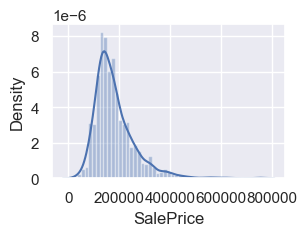

In [512]:
#this will reveal which distribution SalePrice is following.
figure(figsize=(3, 2))
sns.distplot(all_data['SalePrice'])

#### Givn this distribution we can still get some more insight by analysing the skewness and kurtosis of it

#### Skewness indicates how much the data is symmetric around the mean. Kurtosis measures the tails of the distribution.
#### Whenever the data shows a skewness is not in the (-1, 1) range, we say it is highly skewed. High skewness means that one tail is significately longer than the other.
#### Whenever kurtosis is higher than 3 we have a leptokurtic distribution.

In [513]:
print("Skewness: " + str(all_data['SalePrice'].skew()))
print("Kurtosis: " + str(all_data['SalePrice'].kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.5362818600645305


#### We can now analyze how the target variable relates to what seem to be the most relevant features.
#### These have been identified before.

In [514]:
def scatterPlot(feature, y_right=800000):
    figure(figsize=(3, 2))
    data = pd.concat([all_data['SalePrice'], all_data[feature]], axis=1)
    data.plot.scatter(x=feature, y='SalePrice', ylim=(0,y_right))

In [515]:
def boxPlot(feature, right_y=800000):
    data = pd.concat([all_data['SalePrice'], all_data[feature]], axis=1)
    fig = sns.boxplot(x=feature, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=right_y);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 300x200 with 0 Axes>

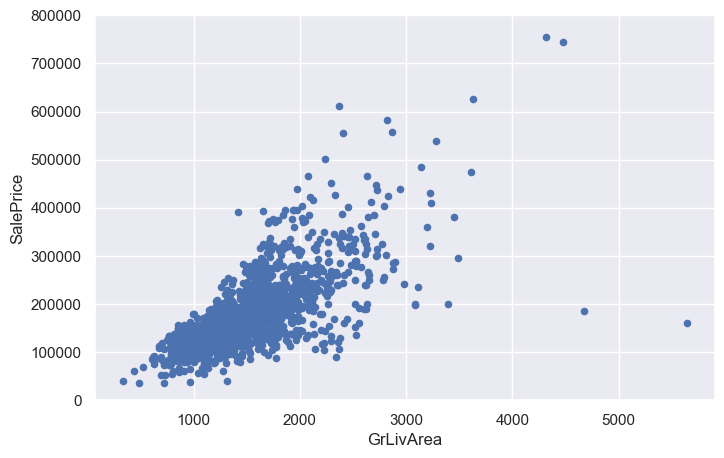

In [516]:
scatterPlot('GrLivArea')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 300x200 with 0 Axes>

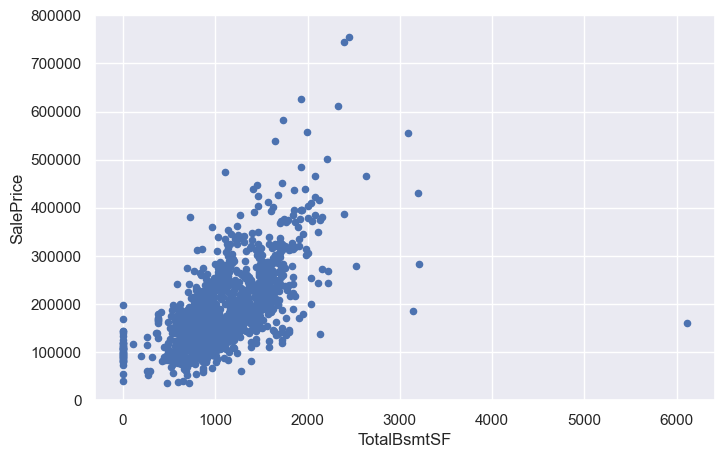

In [517]:
scatterPlot('TotalBsmtSF')

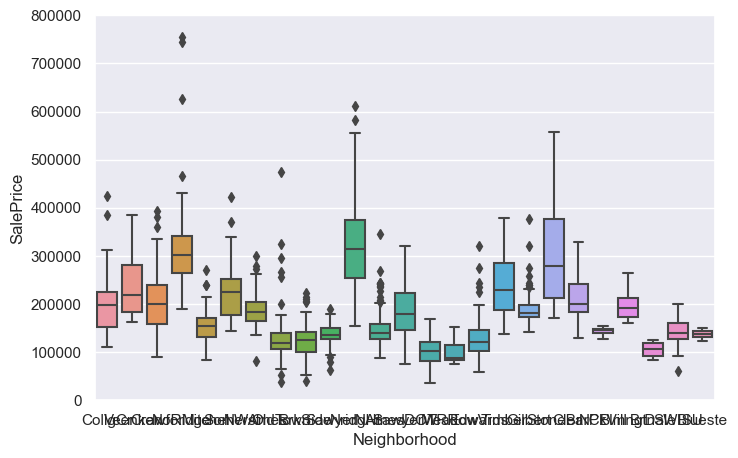

In [518]:
boxPlot('Neighborhood')

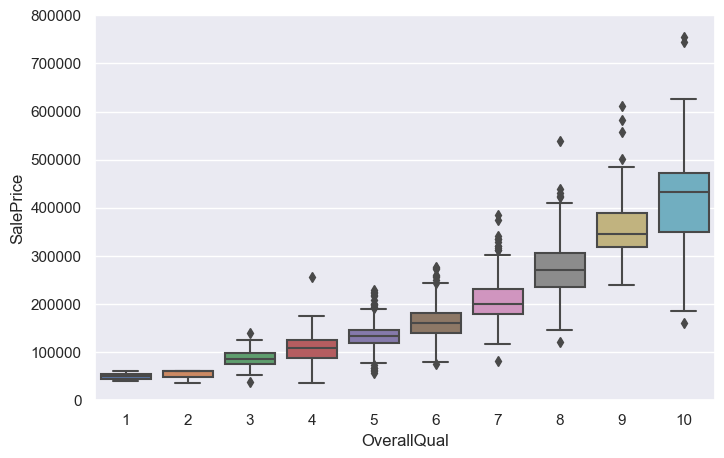

In [519]:
boxPlot('OverallQual')

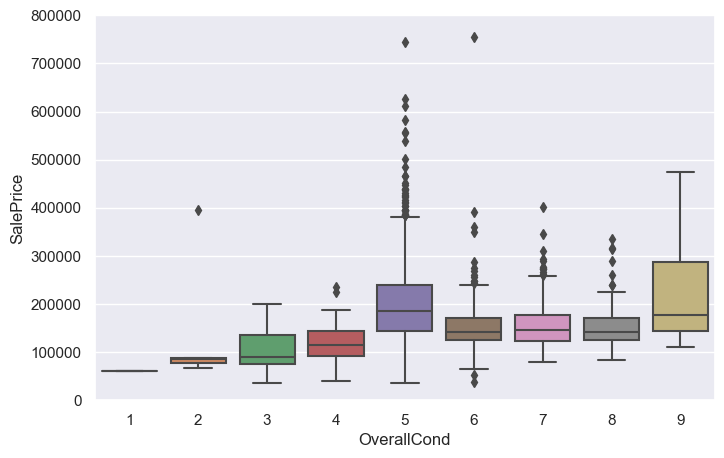

In [520]:
boxPlot('OverallCond')

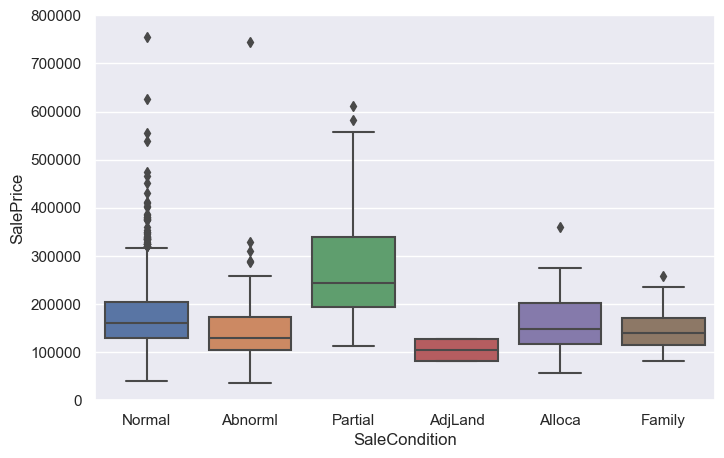

In [521]:
boxPlot('SaleCondition')

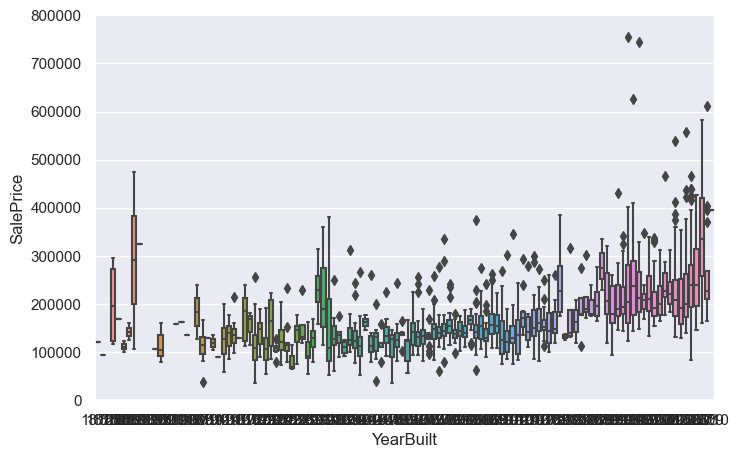

In [522]:
boxPlot('YearBuilt')

# Data Cleaning

In [523]:
col_drop = ['MiscFeature', 'PoolQC', 'Fence', 'Alley']
col_fill = ['FireplaceQu', 'GarageType',  'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

In [524]:
def fill_NaNs(cols):
    for col in cols:
        if is_numeric_dtype(all_data[col]):
            all_data.fillna(all_data[col].median(), inplace=True)
        else:
            all_data[col].fillna(all_data[col].mode()[0], inplace=True)

In [525]:
all_data.drop(col_drop, axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,NaN


In [526]:
fill_NaNs(col_fill)

# Correlation


#### Given we have many variables that determine the salesprice it would be difficult to show an heatmap of them all. So we're only gonna consider the n=12 varibales that are the most correlate wit SalePrice.

<AxesSubplot:>

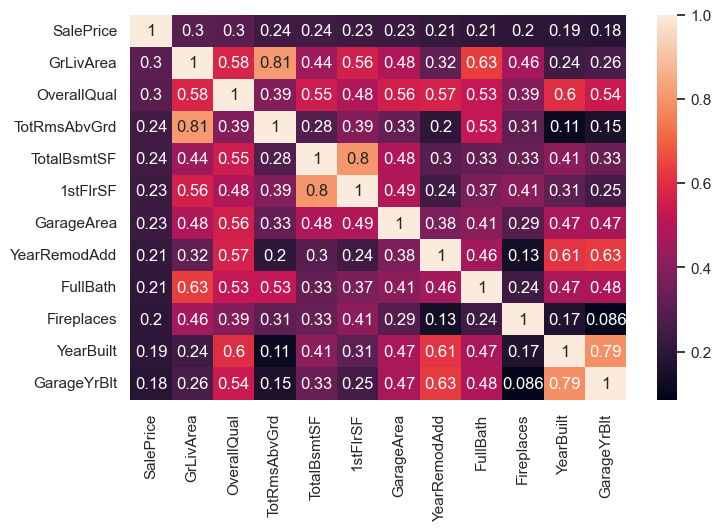

In [527]:
n = 12
correlation_matrix = all_data.corr()
cols = correlation_matrix.nlargest(n, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(all_data[cols].values.T)

sns.set(rc = {'figure.figsize': (8,5)})
sns.heatmap(cm, annot = True, fmt = '.2g', yticklabels=cols.values, xticklabels=cols.values)

C:\Users\Carl\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


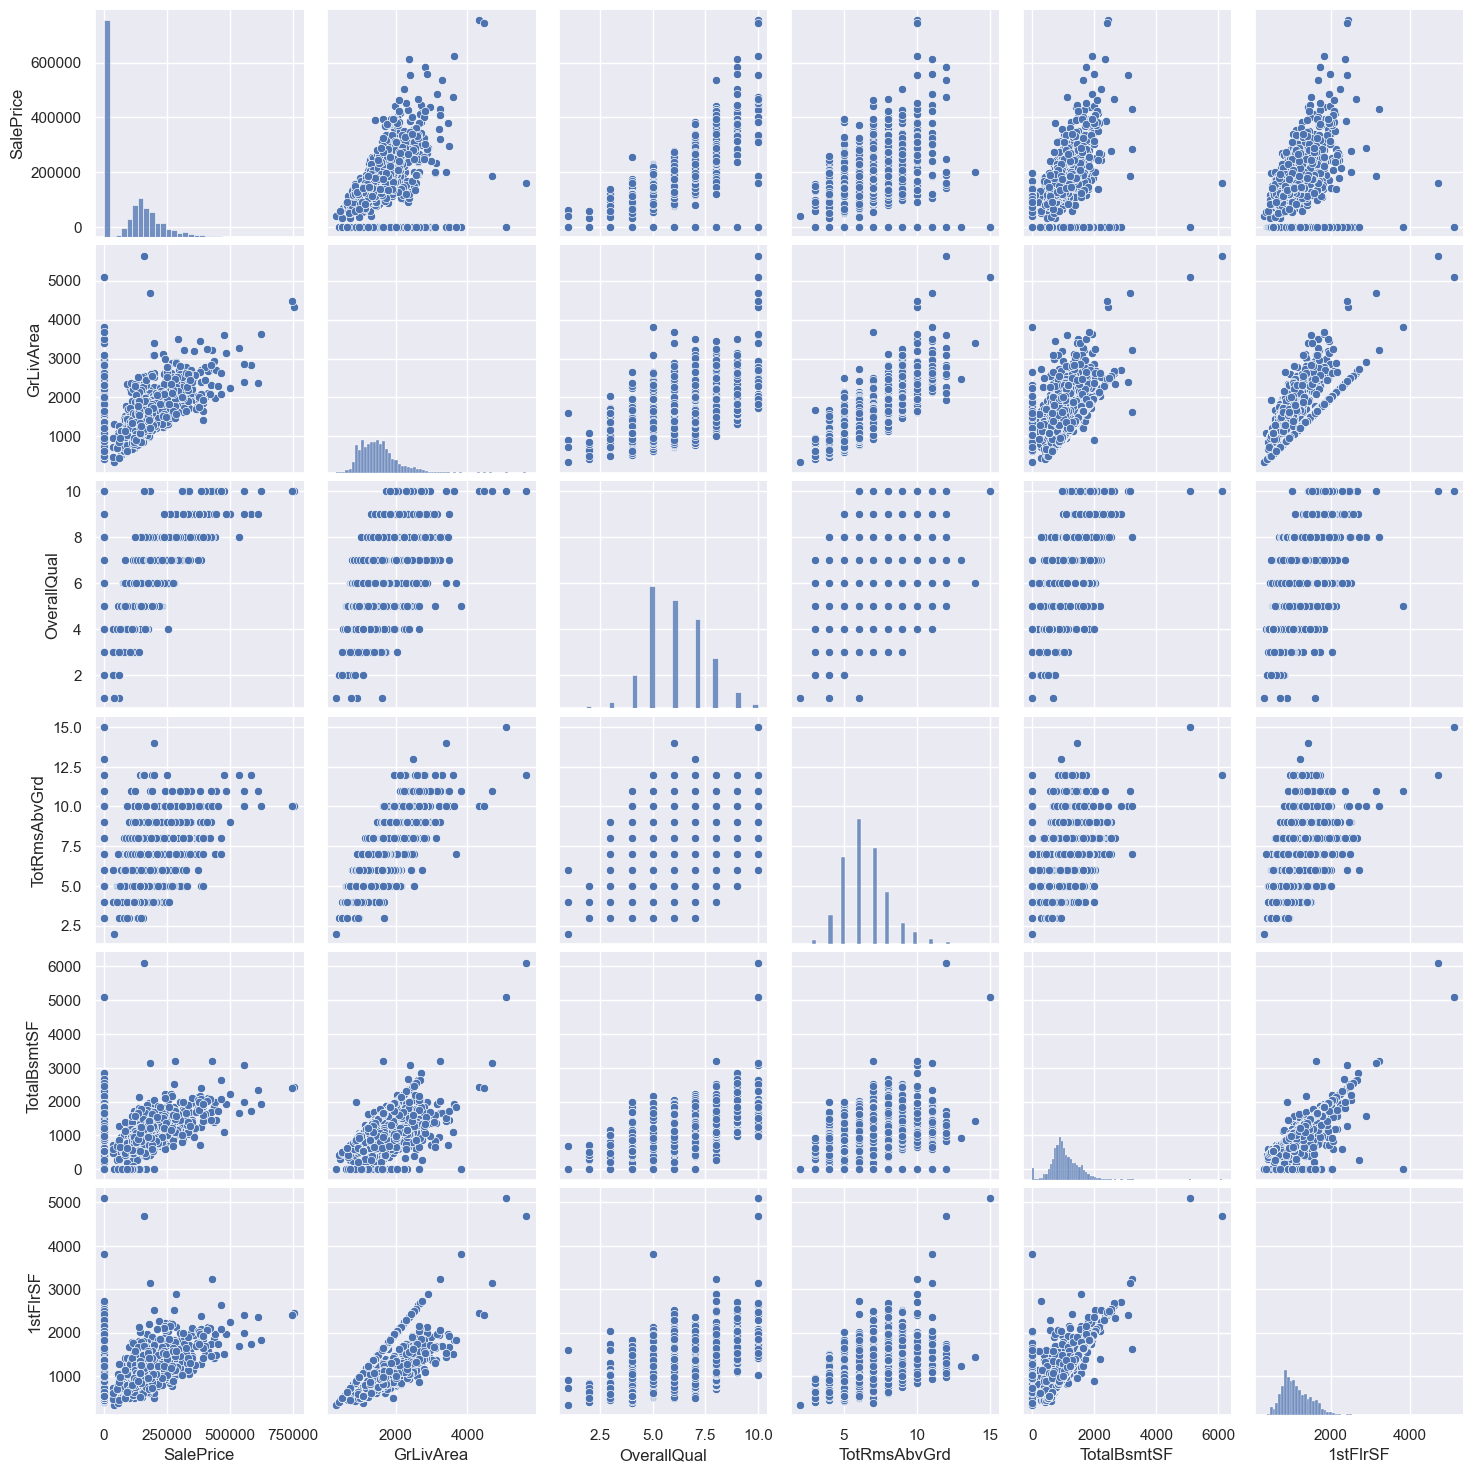

In [528]:
cols = correlation_matrix.nlargest(6, 'SalePrice')['SalePrice'].index
sns.set()
sns.pairplot(all_data[cols], size = 2.5)

# Feature engineering 

In [529]:
features = []
threshold = 0.68
for col in correlation_matrix.columns:
    if col != "SalePrice":
        for feature, value in correlation_matrix[col].iteritems():
            if abs(value) >= threshold and value != 1 and feature != "SalePrice":
                features.append([col, feature])
            else:
                pass
print(features)

[['YearBuilt', 'GarageYrBlt'], ['TotalBsmtSF', '1stFlrSF'], ['1stFlrSF', 'TotalBsmtSF'], ['GrLivArea', 'TotRmsAbvGrd'], ['BsmtFullBath', 'BsmtHalfBath'], ['BsmtHalfBath', 'BsmtFullBath'], ['TotRmsAbvGrd', 'GrLivArea'], ['GarageYrBlt', 'YearBuilt']]


#### It is clear from this that there are many features that can be aggregated together given they exhibit such high correlation

In [530]:
all_data['YearBuilding'] = all_data['YearBuilt'] + all_data['GarageYrBlt']

all_data['Garage'] = all_data['GarageArea'] + all_data['GarageCars']

all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

#### We now want to look at skewness of the features and identify the ones with the highest values. This is done to also reveal the features that have the most influential outliers. High skewness means that there is hugh difference between the mean and the median -> some values are moving the mean away from the median.

In [531]:
#only considering numeric values 
numeric_values = all_data.dtypes[all_data.dtypes != "object"].index

skewedness_col = all_data[numeric_values].apply(lambda x: skew(x)).sort_values(ascending=False)

In [532]:
highly_skewed = skewedness_col[abs(skewedness_col) > 1]

print(highly_skewed)

GarageCars       53.964926
BsmtHalfBath     38.162840
BsmtFullBath     38.158247
MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
MasVnrArea        4.439738
BsmtFinSF2        4.348382
KitchenAbvGr      4.302254
EnclosedPorch     4.003891
ScreenPorch       3.946694
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.786946
TotalSF           1.515085
1stFlrSF          1.469604
Garage            1.457935
BsmtFinSF1        1.426571
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.160868
SalePrice         1.117265
dtype: float64


#### There are many techniques to deal with skewness: log-transformation, square root transformation, reciprocal transformation, Box-Cox transformation. hey ould all be tried but here I'm using the Box-Cox method. 

In [533]:
skewed_features = highly_skewed.index

for feature in skewed_features:
    all_data[feature] = boxcox1p(all_data[feature], boxcox_normmax(all_data[feature] + 1))
    print(feature, skew(all_data[feature]))

GarageCars -0.9187226777737337
BsmtHalfBath 3.756999160765878
BsmtFullBath 0.4704794891740944
MiscVal 5.239894329114258
PoolArea 14.985993701330987
LotArea -0.135400636223225
LowQualFinSF 8.495602449857614
3SsnPorch 8.865144110972263
MasVnrArea 0.9603223211424835
BsmtFinSF2 2.57832053394594
KitchenAbvGr 3.77989603338606
EnclosedPorch 2.1501571443771095
ScreenPorch 3.153911082341244
OpenPorchSF 0.6210253879908608
WoodDeckSF 0.7847681418043773
LotFrontage -0.2896906646219625
TotalSF 0.012143942868841677
1stFlrSF -0.011610700864975931
Garage 0.3872195178240015
BsmtFinSF1 0.37475174842905346
MSSubClass 0.43742335545153266
GrLivArea 0.004848365835839008
TotalBsmtSF 0.3693649273471766
SalePrice 0.7555175399932705


C:\Python310\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Python310\lib\site-packages\scipy\stats\_stats_py.py:4098: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


#### As shown above the Box-Cox method proved to be very effective in reducing skewness but there are still some features that show way to high skwewness. We have to manually remove the outliers that are affecting the results.

In [534]:
#select categorical features from the datframe 
cat_features=[i for i in all_data.columns if all_data.dtypes[i]=='object']

In [535]:
#transform all the categorical features
labelEncoder = preprocessing.LabelEncoder()

for feat in cat_features:
    all_data[feat] = str(all_data[feat])
    all_data[feat] = labelEncoder.fit_transform(all_data[feat])

In [536]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearBuilding,Garage,TotalSF
0,1,6.502441,0,1.216938,13.424522,0,0,0,0,0,...,0,0.0,2,2008,0,0,29415.213797,4006.0,225.860079,22.629466
1,2,4.250991,0,1.223786,13.694528,0,0,0,0,0,...,0,0.0,5,2007,0,0,26237.429677,3952.0,195.322963,22.525570
2,3,6.502441,0,1.218520,14.034135,0,0,0,0,0,...,0,0.0,9,2008,0,0,31148.997808,4002.0,246.200956,22.966648
3,4,6.865585,0,1.213994,13.683422,0,0,0,0,0,...,0,0.0,2,2006,0,0,21182.404313,3913.0,257.908300,22.397618
4,5,6.502441,0,1.225243,14.550144,0,0,0,0,0,...,0,0.0,12,2008,0,0,34163.255458,4000.0,321.014752,24.350899


# Outliers

#### By looking at the charts previously printed we can select the features that seem to haev the highest correlation with "SalePrice", these are 'TotalBsmtSF' and 'GrLivArea'.  Let's plot them and further observe the charts...

In [537]:
train_data = all_data[:train_data.shape[0]]
test_data = all_data[train_data.shape[0]:]

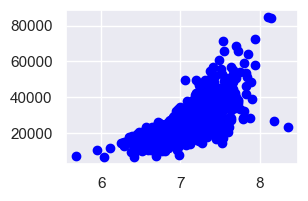

In [538]:
figure(figsize=(3, 2))
scatter(train_data['GrLivArea'], train_data["SalePrice"], c ="blue")

In [539]:
#these are the valeus that seem not to follow the trend 
train_data['GrLivArea'].sort_values()[-2:]

523     8.179626
1298    8.355353
Name: GrLivArea, dtype: float64

ValueError: x and y must be the same size

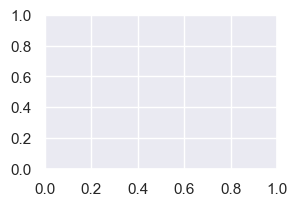

In [540]:
figure(figsize=(3, 2))
scatter(all_data['TotalBsmtSF'], train_data["SalePrice"], c ="blue")

In [ ]:
#these are the valeus that seem not to follow the trend 
train_data['TotalBsmtSF'].sort_values()[-1:]

In [ ]:
bsmt_outliers = train_data['TotalBsmtSF'].sort_values()[-1:]
grLivArea_outLiers = train_data['GrLivArea'].sort_values()[-2:]

In [ ]:
def delete_outLiers(outliers, feat, train_data):
    indices = []
    for out in outliers:   
        indices.append(train_data[feat].loc[(train_data[feat] == out)].index)
          
    for i in indices:
        if len(i.values) == 0:
            continue
        
        i = i.values
        train_data.drop(i, axis=0, inplace=True)
    return train_data

In [ ]:
all_data = delete_outLiers(grLivArea_outLiers, 'GrLivArea', train_data)

In [ ]:
all_data = delete_outLiers(bsmt_outliers, 'TotalBsmtSF', train_data)

#### Double check if the charts now look clean..

In [ ]:
figure(figsize=(3, 2))
scatter(train_data['TotalBsmtSF'], train_data["SalePrice"], c ="blue")

In [ ]:
figure(figsize=(3, 2))
scatter(train_data['GrLivArea'], train_data["SalePrice"], c ="blue")

#### As it shows above the major outliers have been removed...now nothing is preventing us to fit a model to the data

# Model Fitting

#### First we have to split the training data in actual training set and pseudo test part. This allows us to see if the prediction made is actually close to the observed values.  

In [ ]:
X = df1 = df.loc[:, df.columns != 'SalePrice']
Y = train_data['SalePrice']

In [ ]:
#partion the training data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .33, random_state = 0)

#### We now want to create a pipeline to transform the data

In [ ]:

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])